<a href="https://colab.research.google.com/github/Naveen9221/Coding/blob/main/pixel_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving image_data.txt to image_data (9).txt


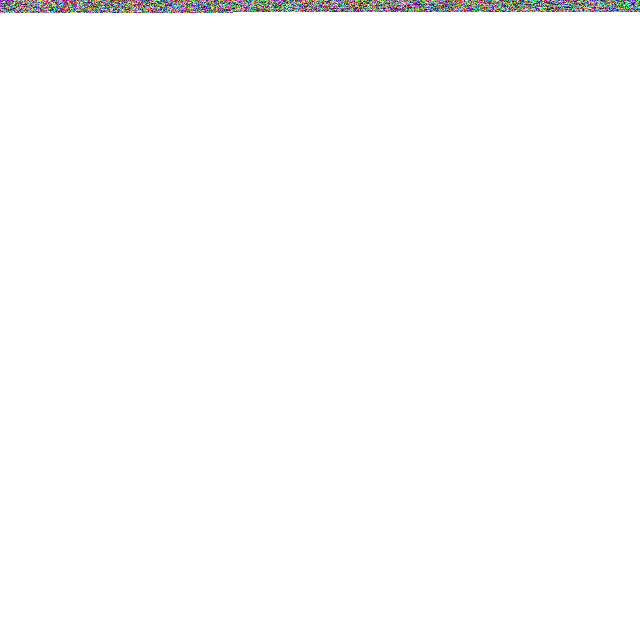

In [11]:
from google.colab import files
from PIL import Image
import numpy as np
from IPython.display import display

# Step 1: Upload file
uploaded = files.upload()

# Step 2: Read hex string and clean it
filename = list(uploaded.keys())[0]
with open(filename, "r") as f:
    hex_data = f.read().replace('\n', '').replace(' ', '')

# Step 3: Fix hex string length to match 640x640 image
target_bytes = 640 * 640 * 3  # 1,228,800 bytes
target_hex_chars = target_bytes * 2  # 2 hex chars per byte → 2,457,600

# If odd length, pad with '0' to avoid bytes.fromhex() error
if len(hex_data) % 2 != 0:
    hex_data += '0'

# Pad with white (FF) bytes if too short
if len(hex_data) < target_hex_chars:
    hex_data += 'FF' * ((target_hex_chars - len(hex_data)) // 2)

# Trim if too long
hex_data = hex_data[:target_hex_chars]

# Step 4: Convert to image
pixel_bytes = bytes.fromhex(hex_data)
img_array = np.frombuffer(pixel_bytes, dtype=np.uint8).reshape((640, 640, 3))

# Step 5: Display and save
img = Image.fromarray(img_array, 'RGB')
img.save('output.png')
display(img)
